In [1]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns






In [2]:
# Mount Google Drive (if using Colab)
#from google.colab import drive
#drive.mount('/content/drive')

 

# Load the data
data_path = "final_combined_dataset.csv"
df = pd.read_csv(data_path)


In [3]:
# Prepare the data
texts = df['Text'].values.astype(str)
labels = (df['Label'] == 'fake').astype(int)

 

# Transform the texts using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

 

Accuracy: 0.9070530344450519
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2817
           1       0.91      0.90      0.90      2670

    accuracy                           0.91      5487
   macro avg       0.91      0.91      0.91      5487
weighted avg       0.91      0.91      0.91      5487

Confusion Matrix:
 [[2585  232]
 [ 278 2392]]


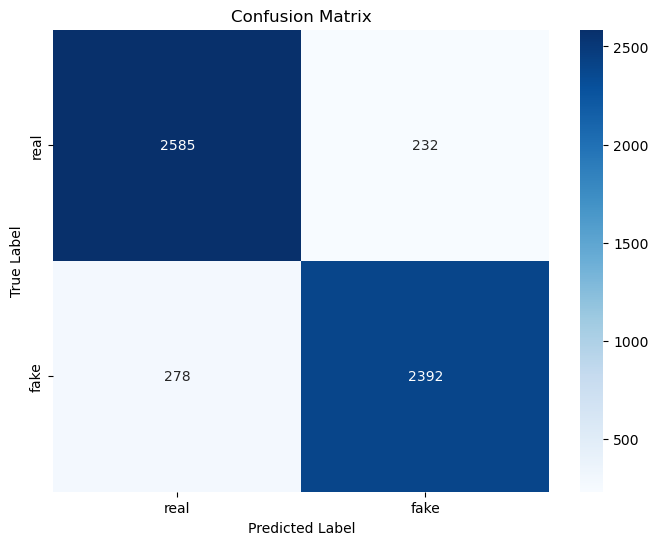

In [4]:
## SVM Model
# Train the SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

 

# Evaluate the model
y_pred = model.predict(X_test)

 

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['real', 'fake'], yticklabels=['real', 'fake'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9052305449243667
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2817
           1       0.93      0.88      0.90      2670

    accuracy                           0.91      5487
   macro avg       0.91      0.90      0.90      5487
weighted avg       0.91      0.91      0.91      5487

Confusion Matrix:
 [[2629  188]
 [ 332 2338]]


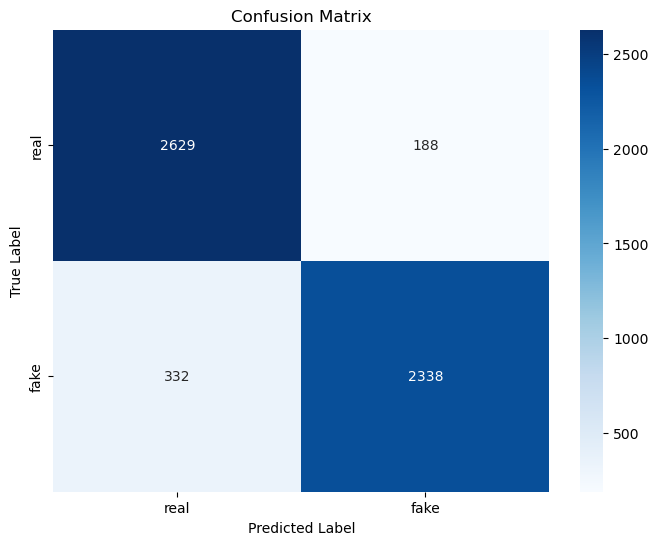

In [5]:

 
# Train the Random Forest model

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
 
# Evaluate the model

y_pred = model.predict(X_test)
 
# Print metrics

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
 
# Visualize the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['real', 'fake'], yticklabels=['real', 'fake'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
 